In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport


c:\Users\Malek\Desktop\classification LAST TOP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('dataframe_nettoye.csv')

df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
df['ChgOffDate'] = pd.to_datetime(df['ChgOffDate'], errors='coerce')
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'], errors='coerce')
df['NAICS'] = df['NAICS'].astype(str).str[:2].astype(int).values.reshape(-1, 1)


C:\Users\Malek\AppData\Local\Temp\ipykernel_21648\2136556077.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ChgOffDate'] = pd.to_datetime(df['ChgOffDate'], errors='coerce')
C:\Users\Malek\AppData\Local\Temp\ipykernel_21648\2136556077.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'], errors='coerce')


In [53]:
df['NAICS'].unique()

array([45, 72, 62,  0, 33, 81, 23, 44, 42, 61, 53, 54, 31, 51, 71, 52, 21,
       32, 56, 48, 11, 92, 22, 49, 55])

In [54]:
profile = ProfileReport(df, title="Profiling Report")

In [55]:
profile.to_file("rapport_SBA_dataset.html")

Summarize dataset:  87%|████████▋ | 33/38 [00:18<00:03,  1.39it/s, Calculate auto correlation]         c:\Users\Malek\Desktop\classification LAST TOP\.venv\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4 7 6 ... 3 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 20.89it/s]


In [5]:
df.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int32
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate           datetime64[ns]
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
MIS_Status                   object
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
has_chgoff_date             

In [6]:
from sklearn.preprocessing import LabelEncoder

# Remplacer d'abord les NaN par une valeur significative dans RevLineCr
df['RevLineCr'] = df['RevLineCr'].fillna('Unknown')

# Appliquer LabelEncoder
le = LabelEncoder()
df['RevLineCr'] = le.fit_transform(df['RevLineCr'])
df['LowDoc'] = le.fit_transform(df['LowDoc'])
df['MIS_Status'] = le.fit_transform(df['MIS_Status'])
df['State'] = le.fit_transform(df['State'])
df['BankState'] = le.fit_transform(df['BankState'])


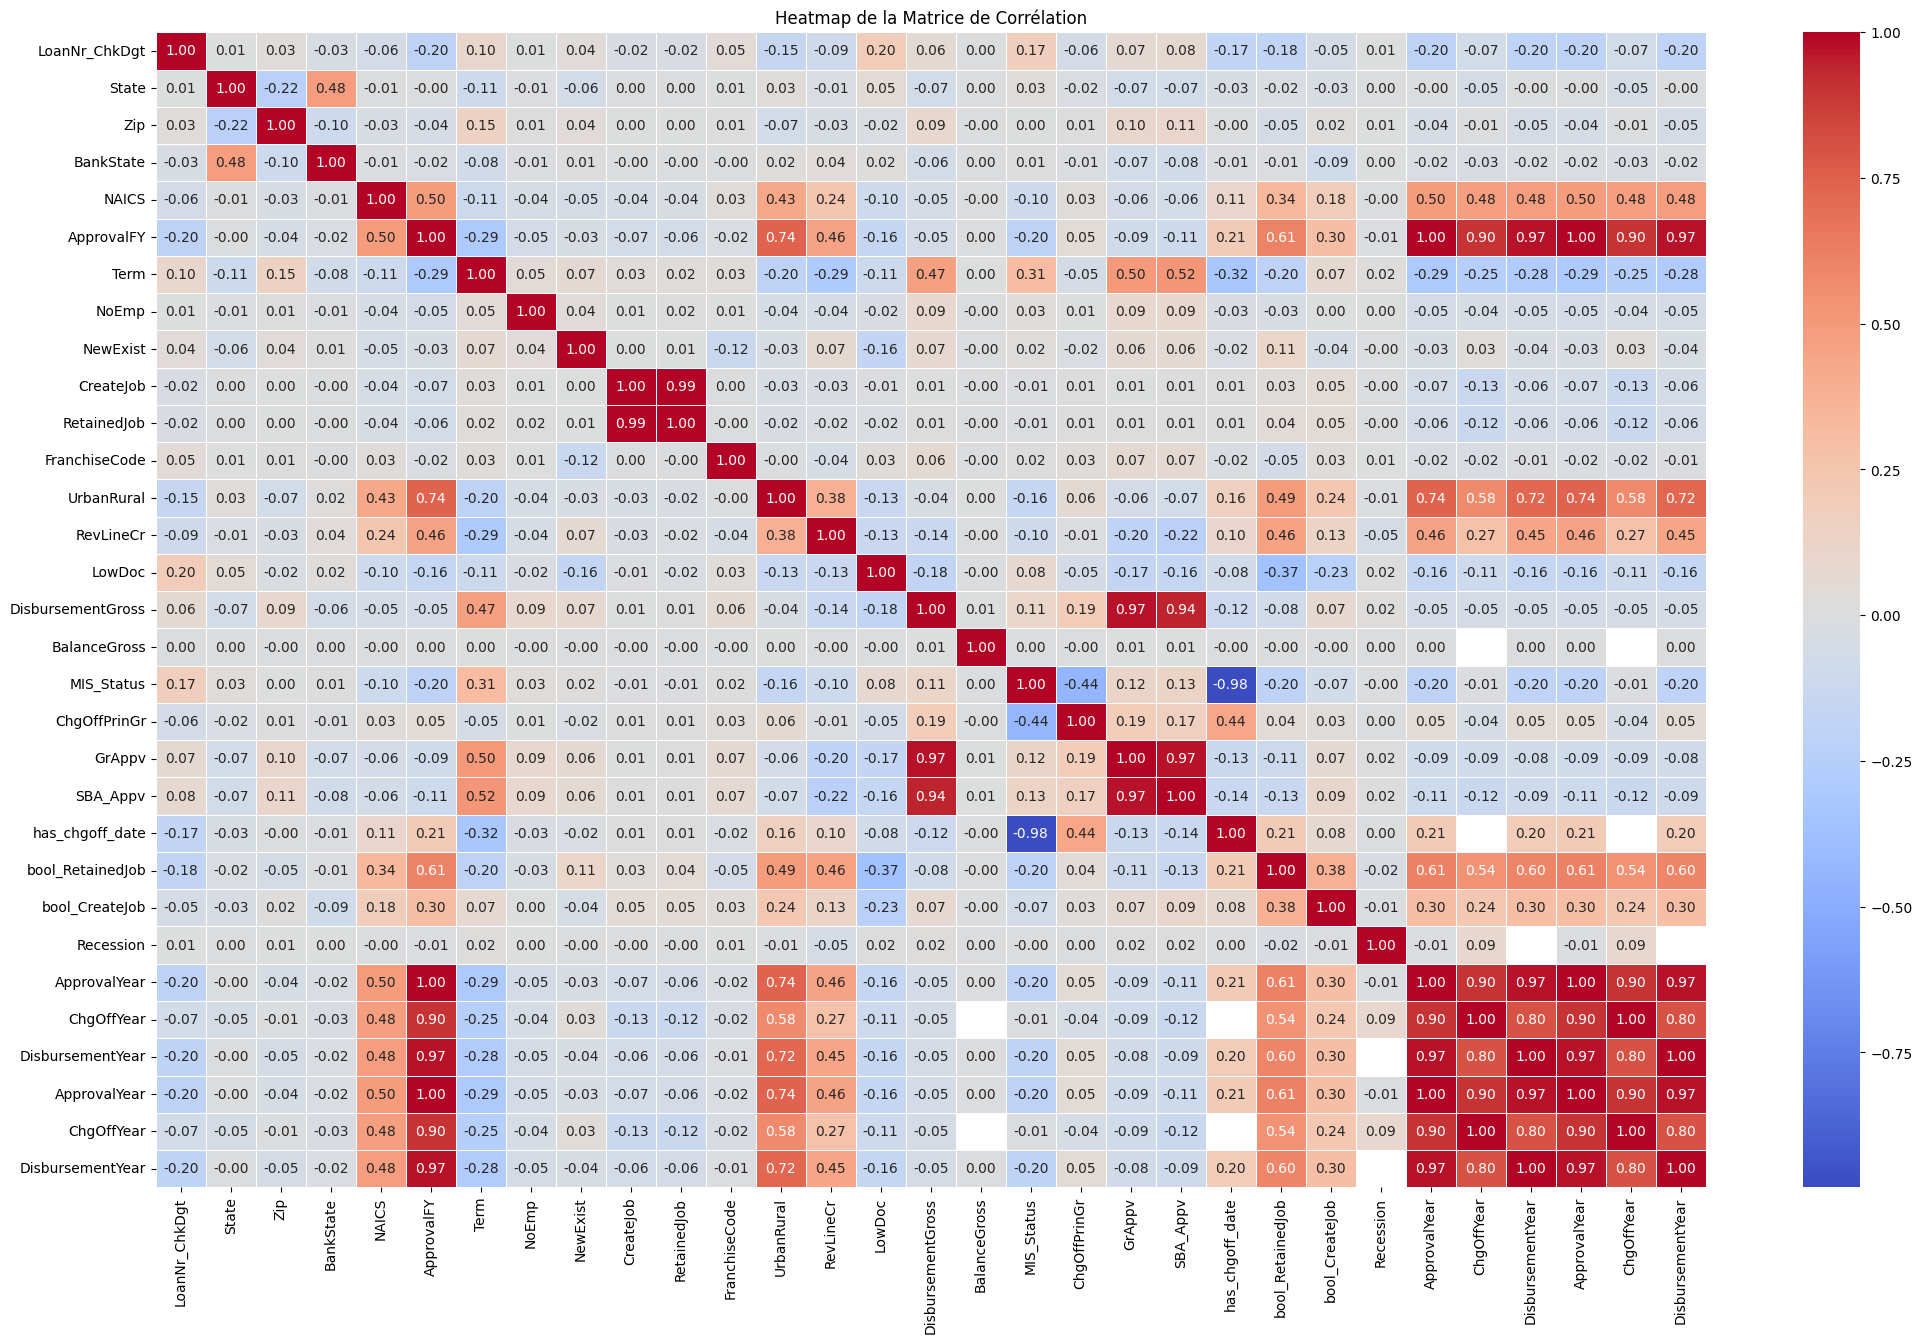

In [11]:
import numpy as np

# Sélectionner les colonnes numériques et les dates
numeric_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

# Transformations éventuelles pour les colonnes de date (par exemple, extraire l'année)
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ChgOffYear'] = df['ChgOffDate'].dt.year
df['DisbursementYear'] = df['DisbursementDate'].dt.year

# Ajouter les nouvelles colonnes numériques résultant des transformations aux colonnes sélectionnées
numeric_columns.extend(['ApprovalYear', 'ChgOffYear', 'DisbursementYear'])

# Sélectionner les données pour la corrélation
correlation_df = df[numeric_columns]

# Calculer et afficher la matrice de corrélation
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de la Matrice de Corrélation")
plt.show()
